In [24]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn.init as nninit
import uuid
import torch.onnx
import scipy.misc

## Creating pixels with a neural net


In [2]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.ln1 = nn.Linear(z_size + 3,32,bias=False)  # set the input size according to z
        self.ln2 = nn.Linear(32,32,bias=False)
        self.ln3 = nn.Linear(32,32,bias=False)
        #self.ln4 = nn.Linear(32,1,bias=False)      # grey scale version
        self.ln4 = nn.Linear(32,3,bias=False)      # colour version
        nninit.uniform(self.ln1.weight, a=-1,b=1)
        nninit.uniform(self.ln2.weight,a=-1,b=1)
        nninit.uniform(self.ln3.weight,a=-1,b=1)
        nninit.uniform(self.ln4.weight,a=-1,b=1)
        self.tanh1 = nn.Tanh()
        self.tanh2 = nn.Tanh()
        self.tanh3 = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        U = self.ln1(x)
        U = self.tanh1(U)
        U = self.ln2(U)
        U = self.tanh2(U)
        U = self.ln3(U)
        U = self.tanh3(U)
        U = torch.sin(self.ln4(U))
        return self.sigmoid(U)


In [32]:
img_size = 128
scale = 0.1
z_size = 7  # min 7
num_images = 10

model_dir = 'models/'
base_name = "images/"

model_name = 'arts_model'
pytorch_ending = ".pt"
onnx_ending = ".onnx"

In [4]:
def createInputVec(z,x,y):
    r = math.sqrt(((x*scale-(img_size*scale/2))**2) + ((y*scale-(img_size*scale/2))**2) )
    z_size = len(z)
    input = torch.rand(1,z_size + 3)
    
    for i in range(z_size):
        input[0][i] = z[i] * scale
        
    input[0][z_size] = x * scale
    input[0][z_size+1] = y * scale
    input[0][z_size+2] = r
    input = Variable(input)
    return input

C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\openVINO\lib\site-packages\ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\openVINO\lib\site-packages\ipykernel_launcher.py:10: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\openVINO\lib\site-packages\ipykernel_launcher.py:11: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\openVINO\lib\site-packages\ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


Image no. 1
images/imagearts_model_1.png


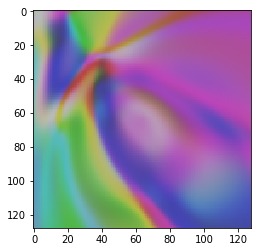

Image no. 2


C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\openVINO\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


images/imagearts_model_2.png


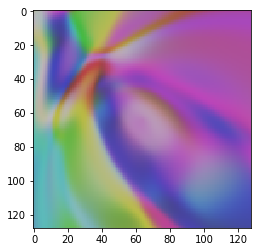

Image no. 3
images/imagearts_model_3.png


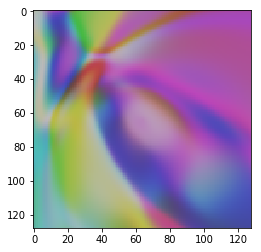

Image no. 4
images/imagearts_model_4.png


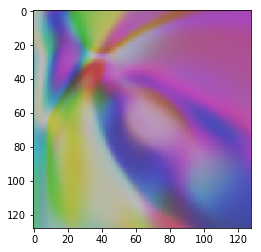

Image no. 5
images/imagearts_model_5.png


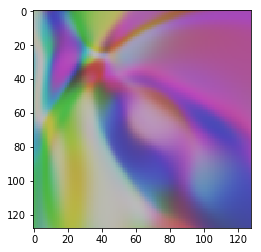

Image no. 6
images/imagearts_model_6.png


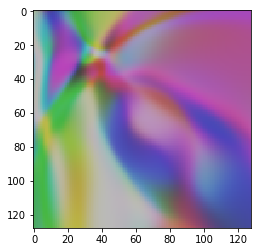

Image no. 7
images/imagearts_model_7.png


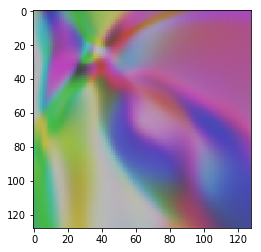

Image no. 8
images/imagearts_model_8.png


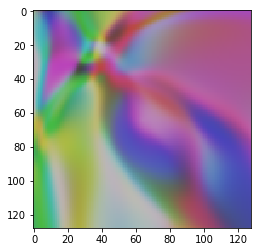

Image no. 9
images/imagearts_model_9.png


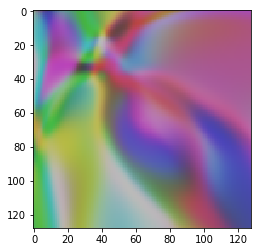

Image no. 10
images/imagearts_model_10.png


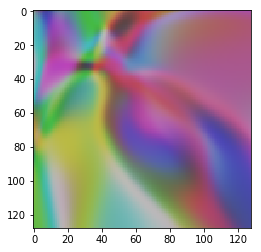

In [31]:
G = net()
#batch produce
z = torch.rand(z_size)
for i in range(num_images):
    print("Image no. "+str(i+1))
    z[0] = z[0] + 1
    z[1] = z[1] + 1
    z[2] = z[2] + 1
    z[3] = z[3] + 1
    z[4] = z[4] + 1
    z[5] = z[5] + 1
    z[6] = z[6] + 1
     
    #image = np.zeros((img_size ** 2, 1)) # gray scale version
    image = np.zeros((img_size ** 2, 3)) # colour version
    for x in range(img_size):
        
        for y in range(img_size):
            input = createInputVec(z,x,y)
            image[x*img_size + y] = G(input).data.numpy()

    #image = np.stack((image,image,image), axis=1)
    #image = image.reshape(img_size,img_size) # gray scale version

    image = image.reshape(img_size,img_size,3) # gray scale version
    image_name = base_name + model_name + "_" + str(i+1)+ ".png"
    print(image_name)

    imgplot = plt.imshow(image)#, cmap='gray')    # cmap was missing and displaying grayscale images as "coloured"
    plt.show()
    #plt.savefig(image_name)
    scipy.misc.imsave(image_name, image)
    #


## Save pytorch and ONNX models ##

In [30]:
# save pytorch model
torch.save(G, model_dir+model_name+pytorch_ending)

# save onnx model
dummy_input = torch.randn(1, z_size + 3) # same size as input.shape
torch.onnx.export(G, dummy_input, model_dir+model_name+onnx_ending)

C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\openVINO\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
